In [9]:
import numpy as np 
import pandas as pd

In [11]:
df=pd.read_csv('spam.csv',encoding='latin1')

In [12]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [13]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3900,ham,That depends. How would you like to be treated...,NaN,NaN,NaN
1928,spam,Call from 08702490080 - tells u 2 call 0906635...,NaN,NaN,NaN
2698,spam,FROM 88066 LOST å£12 HELP,NaN,NaN,NaN
2343,ham,1) Go to write msg 2) Put on Dictionary mode 3...,NaN,NaN,NaN
3533,ham,Good evening! How are you?,NaN,NaN,NaN


#1. DATA CLEANING

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [20]:
#Droping last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [22]:
df.sample(5)

,v1,v2
4807,ham,What's up my own oga. Left my phone at home an...
4085,ham,Lemme know when you're here
3815,ham,How long does it take to get it.
2365,ham,Ok try to do week end course in coimbatore.
3488,ham,I'm also came to room.


In [24]:
df.rename(columns={'v1':'target' , 'v2':'text'},inplace=True)

In [26]:
df.sample(5)

,target,text
5173,ham,U 2.
1179,ham,To day class is there are no class.
1267,ham,SERIOUSLY. TELL HER THOSE EXACT WORDS RIGHT NOW.
2362,ham,How are you doing? Hope you've settled in for ...
4176,ham,Ok lor then we go tog lor...


In [28]:
from sklearn.preprocessing import LabelEncoder

In [30]:
encoder=LabelEncoder()

In [32]:
df['target']=encoder.fit_transform(df['target'])

In [34]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
df.shape

(5572, 2)

In [38]:
#missing Value
df.isnull().sum()

target    0
text      0
dtype: int64

In [40]:
#duplicate values
df.duplicated().sum()

403

In [42]:
df.drop_duplicates(keep='first',inplace=True)

In [44]:
df.shape

(5169, 2)

#2. EDA

In [47]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

In [49]:
import matplotlib.pyplot as plt

([<matplotlib.patches.Wedge at 0x252e7170110>,
 [Text(-1.0144997251399075, 0.4251944351600247, 'ham'),
  Text(1.014499764949479, -0.4251943401757036, 'spam')],
 [Text(-0.5533634864399495, 0.23192423736001344, '87.37'),
  Text(0.5533635081542612, -0.23192418555038377, '12.63')])

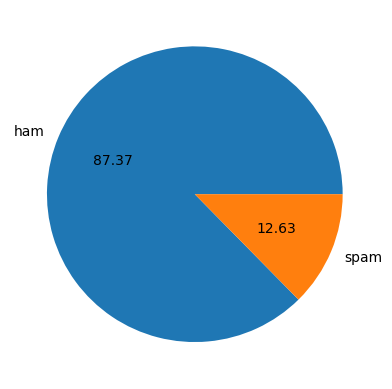

In [51]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%.2f')

#DATA IS IMBALANCED

In [54]:
import nltk

In [55]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Deepak19\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [56]:
df['num_characters']=df['text'].apply(len)

In [57]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [58]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [59]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [61]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [63]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [65]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [66]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

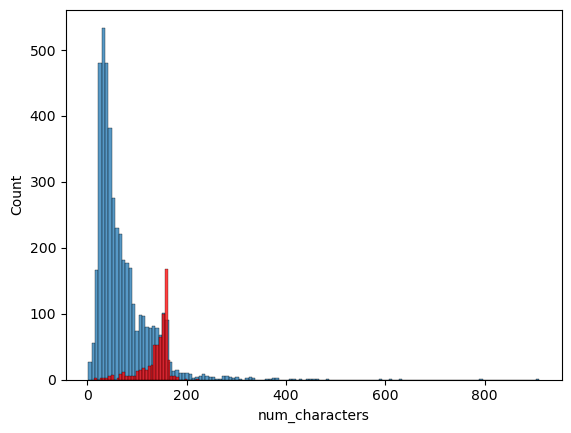

In [68]:
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

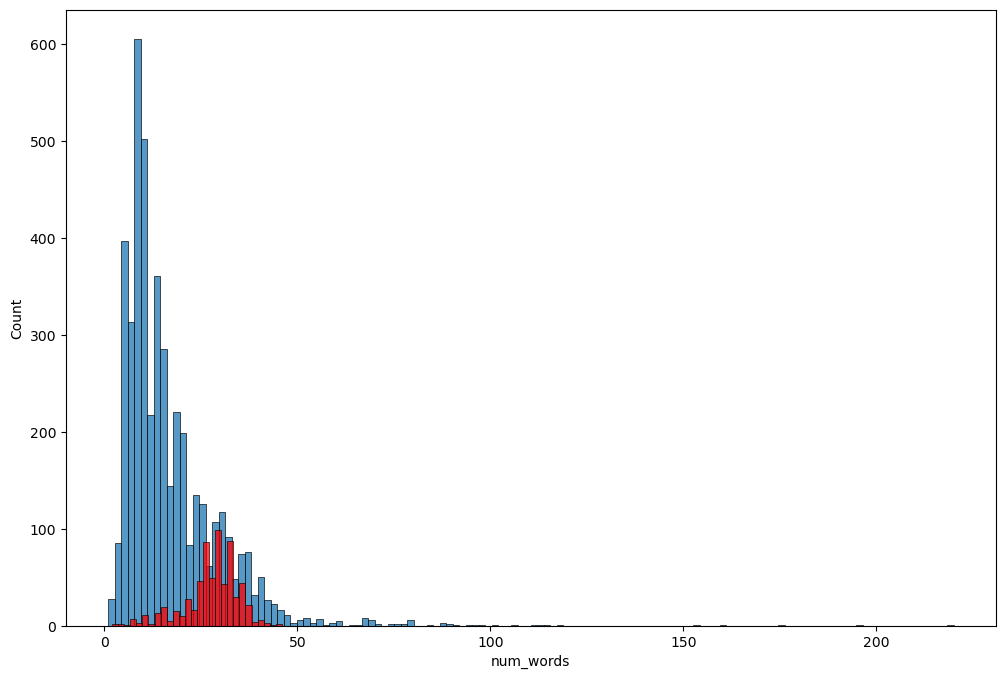

In [69]:
plt.figure(figsize=(12,8))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

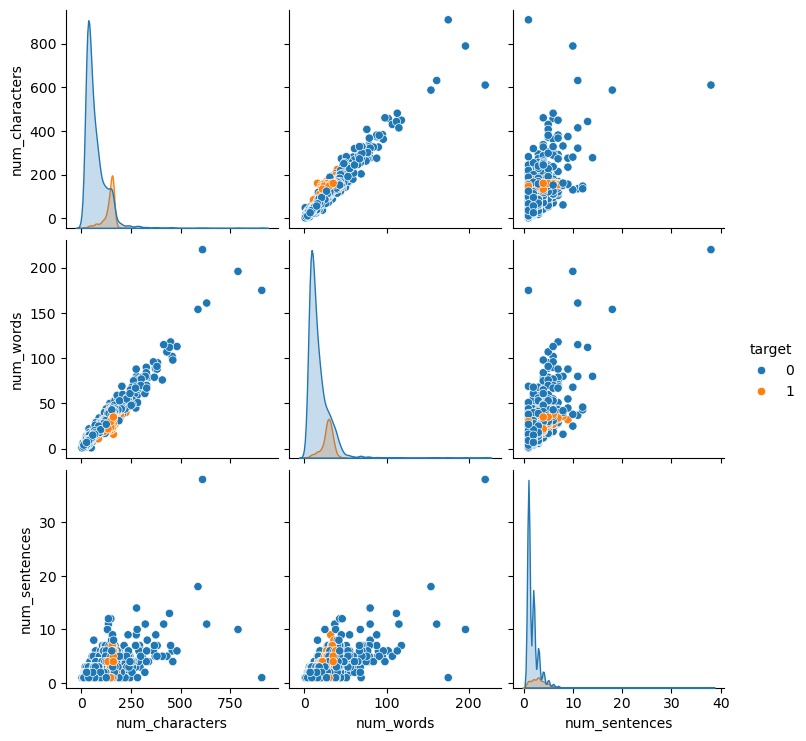

In [76]:
sns.pairplot(df,hue='target')

In [77]:
df[['target','num_characters','num_words','num_sentences']].corr()

,target,num_characters,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_characters,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<Axes: >

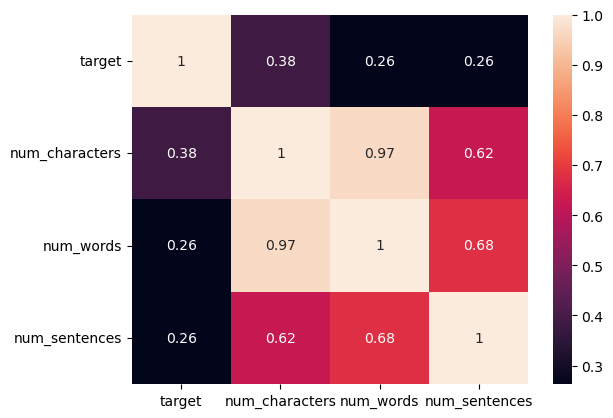

In [80]:
sns.heatmap(df[['target','num_characters','num_words','num_sentences']].corr(),annot=True)

#3. DATA PREPROCESSING
 lower case

 Tokenization

 Removing special characters

 Removing stop words and punctuation

 Stemming

In [82]:
def transform_text(text):

    text=text.lower()
    text=nltk.word_tokenize(text)

    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
        
    text=y[:] # cloning as y is a list
    y.clear()
    
    for i in text:
        if i  not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text=y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y) 


In [83]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deepak19\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [84]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [85]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [86]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('helped')

'help'

In [87]:
transform_text(df['text'][100])

'okay name ur price long legal wen pick u ave x am xx'

In [88]:
df['transform_text']=df['text'].apply(transform_text)

In [89]:
df.head()

,target,text,num_characters,num_words,num_sentences,transform_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [90]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [91]:
spam_wc=wc.generate(df[df['target']==1]['transform_text'].str.cat(sep=" "))

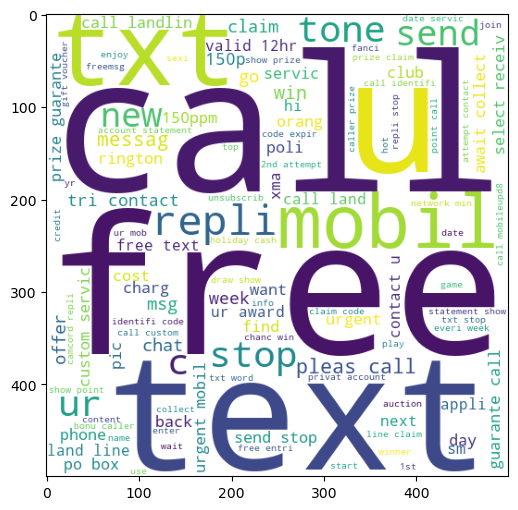

In [94]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [95]:
ham_wc=wc.generate(df[df['target']==0]['transform_text'].str.cat(sep=" "))

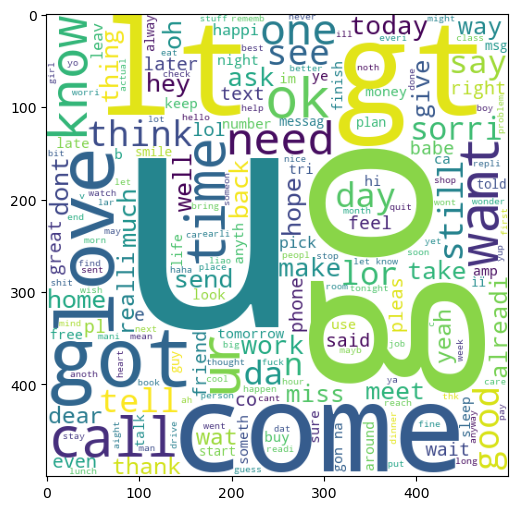

In [99]:
plt.figure(figsize=(12,6))
plt.imshow(ham_wc)

#finding top 50 words in ham and spam text

In [105]:
spam_corpus=[]
temp=df[df['target']==1]['transform_text'].tolist()
for msg in temp:
    for word in msg.split():
        spam_corpus.append(word)
        

In [106]:
len(spam_corpus)

9939

In [107]:
from collections import Counter
new_df_spam=pd.DataFrame(Counter(spam_corpus).most_common(50))

In [108]:
new_df_spam.head()

,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122


<function matplotlib.pyplot.show(close=None, block=None)>

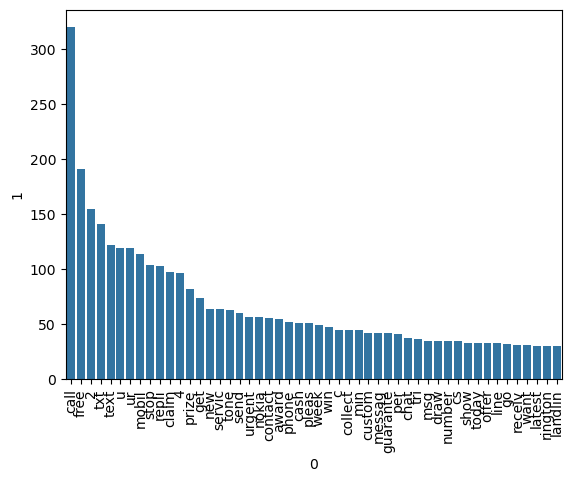

In [109]:
sns.barplot(x=new_df_spam[0],y=new_df_spam[1])
plt.xticks(rotation='vertical')
plt.show

In [110]:
ham_corpus=[]
temp=df[df['target']==0]['transform_text'].tolist()
for msg in temp:
    for word in msg.split():
        ham_corpus.append(word)
        

In [111]:
print(len(ham_corpus))
from collections import Counter
new_df_ham=pd.DataFrame(Counter(ham_corpus).most_common(50))

35404


In [112]:
from collections import Counter
new_df_ham=pd.DataFrame(Counter(ham_corpus).most_common(50))

In [113]:
new_df_ham.head()

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287


<function matplotlib.pyplot.show(close=None, block=None)>

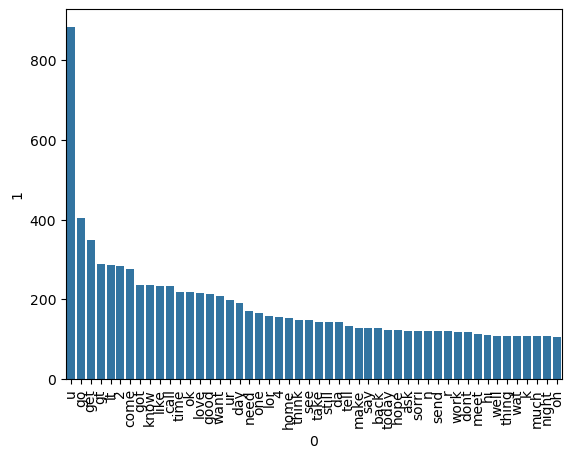

In [114]:
sns.barplot(x=new_df_ham[0],y=new_df_ham[1])
plt.xticks(rotation='vertical')
plt.show

# 4. Model Building

In [187]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
# tfidf=TfidfVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [189]:
x=tfidf.fit_transform(df['transform_text']).toarray()

In [190]:
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [193]:
y=df['target'].values

In [195]:
y

array([0, 0, 1, ..., 0, 0, 0])

In [196]:
from sklearn.model_selection import train_test_split

In [197]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [198]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix ,precision_score

In [199]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [200]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [201]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [202]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))# consider more

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [203]:
#using tfidf -> mnb

In [211]:
!pip install xgboost

In [212]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [215]:
svc = SVC(kernel='sigmoid' , gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear' , penalty='l1')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt =GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [216]:
clfs={
    'svc' : svc,
    'KN' : knc,
    'NB' : mnb,
    'DT' : dtc,
    'LR' : lrc,
    'RF' : rfc,
    'AdaBoost' : abc,
    'BgC' : bc,
    'ETC' :etc,
    'GBDT' : gbdt,
    'xgb' : xgb
}

In [217]:
def train_classifier(clf,x_train,x_test,y_train,y_test):
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    precision=precision_score(y_test,y_pred)

    return accuracy, precision

In [218]:
train_classifier(svc,x_train,x_test,y_train,y_test)

(0.9758220502901354, 0.9747899159663865)

In [219]:
accuracy_scores=[]
precision_scores=[]

for name , clf in clfs.items():
    current_accuracy,current_precision=train_classifier(clf,x_train,x_test,y_train,y_test)

    print("for ", name)
    print("Acuuracy- ", current_accuracy)
    print("Precision- ", current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)


for  svc
Acuuracy-  0.9758220502901354
Precision-  0.9747899159663865
for  KN
Acuuracy-  0.9052224371373307
Precision-  1.0
for  NB
Acuuracy-  0.9709864603481625
Precision-  1.0
for  DT
Acuuracy-  0.9274661508704062
Precision-  0.8118811881188119
for  LR
Acuuracy-  0.9584139264990329
Precision-  0.9702970297029703
for  RF
Acuuracy-  0.9758220502901354
Precision-  0.9829059829059829


C:\Users\Deepak19\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


for  AdaBoost
Acuuracy-  0.960348162475822
Precision-  0.9292035398230089
for  BgC
Acuuracy-  0.9584139264990329
Precision-  0.8682170542635659
for  ETC
Acuuracy-  0.9748549323017408
Precision-  0.9745762711864406
for  GBDT
Acuuracy-  0.9468085106382979
Precision-  0.9191919191919192
for  xgb
Acuuracy-  0.9671179883945842
Precision-  0.9262295081967213


In [136]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [137]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,svc,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [138]:
performance_df1=pd.melt(performance_df,id_vars="Algorithm")

In [139]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,svc,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


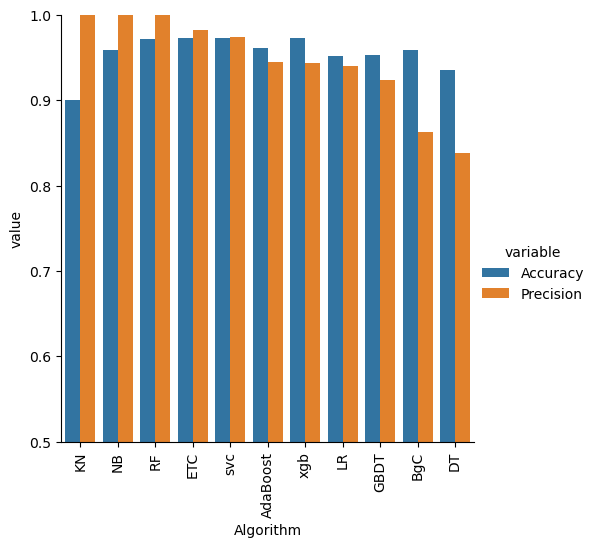

In [140]:
sns.catplot(x='Algorithm',y='value',
           hue='variable',data=performance_df1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [220]:
#model improove
#1. change the max_features parameter of TfIdf

In [221]:
temp_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [222]:
performance_df.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,svc,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217


In [288]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))